## Data exploring

Setup

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [12]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


#### Cleaning data 2.5% bottom and 2.5% top

In [13]:
mask = (df["value"] >= df["value"].quantile(0.025)) & (
    df["value"] <= df["value"].quantile(0.975)
)
df = df[mask]

## Draw plot

<function matplotlib.pyplot.show(close=None, block=None)>

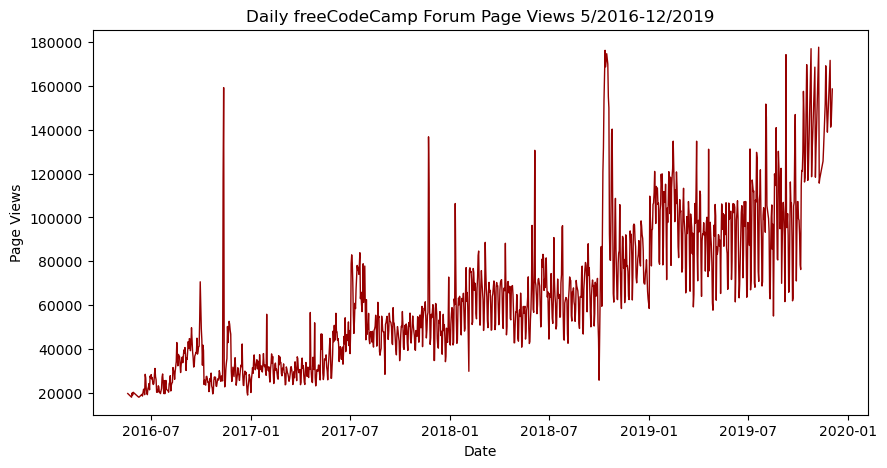

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df.value, color='#960000', linewidth=1)

ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_ylabel("Page Views")
ax.set_xlabel("Date")
plt.show

## Bars plot

In [15]:
df["month"] = df.index.month
df["year"] = df.index.year

df_bars = df.groupby(["year", "month"])["value"].mean()
df_bars = df_bars.unstack()

df_bars


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


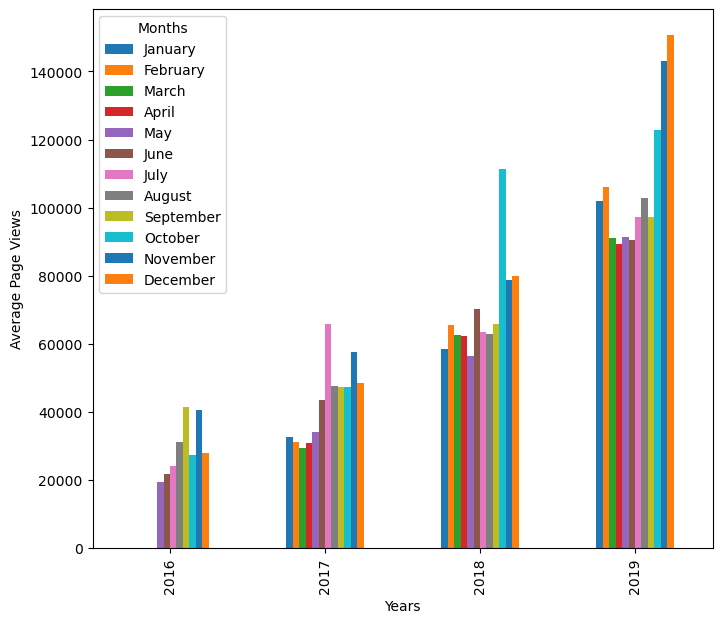

In [16]:
fig = df_bars.plot.bar(
    legend=True, xlabel="Years", ylabel="Average Page Views", figsize=(8, 7)
)
plt.legend(
    [
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
    title="Months",
)

## Box plot

In [17]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = [d.year for d in df_box.date]
df_box["month"] = [d.strftime("%b") for d in df_box.date]
df_box

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016
...,...,...,...,...
1233,2019-11-24,138875,Nov,2019
1234,2019-11-29,171584,Nov,2019
1235,2019-11-30,141161,Nov,2019
1236,2019-12-01,142918,Dec,2019


In [18]:
df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")
df_box["month"] = df_box["month"].str.capitalize()
df_box

,date,value,month,year,month_num
210,2017-01-06,37353,Jan,2017,1
937,2019-01-06,94108,Jan,2019,1
936,2019-01-05,77897,Jan,2019,1
935,2019-01-04,94514,Jan,2019,1
934,2019-01-03,100710,Jan,2019,1
...,...,...,...,...,...
567,2017-12-29,72819,Dec,2017,12
566,2017-12-28,51018,Dec,2017,12
565,2017-12-27,43075,Dec,2017,12
201,2016-12-28,28424,Dec,2016,12


Text(0.5, 0, 'Month')

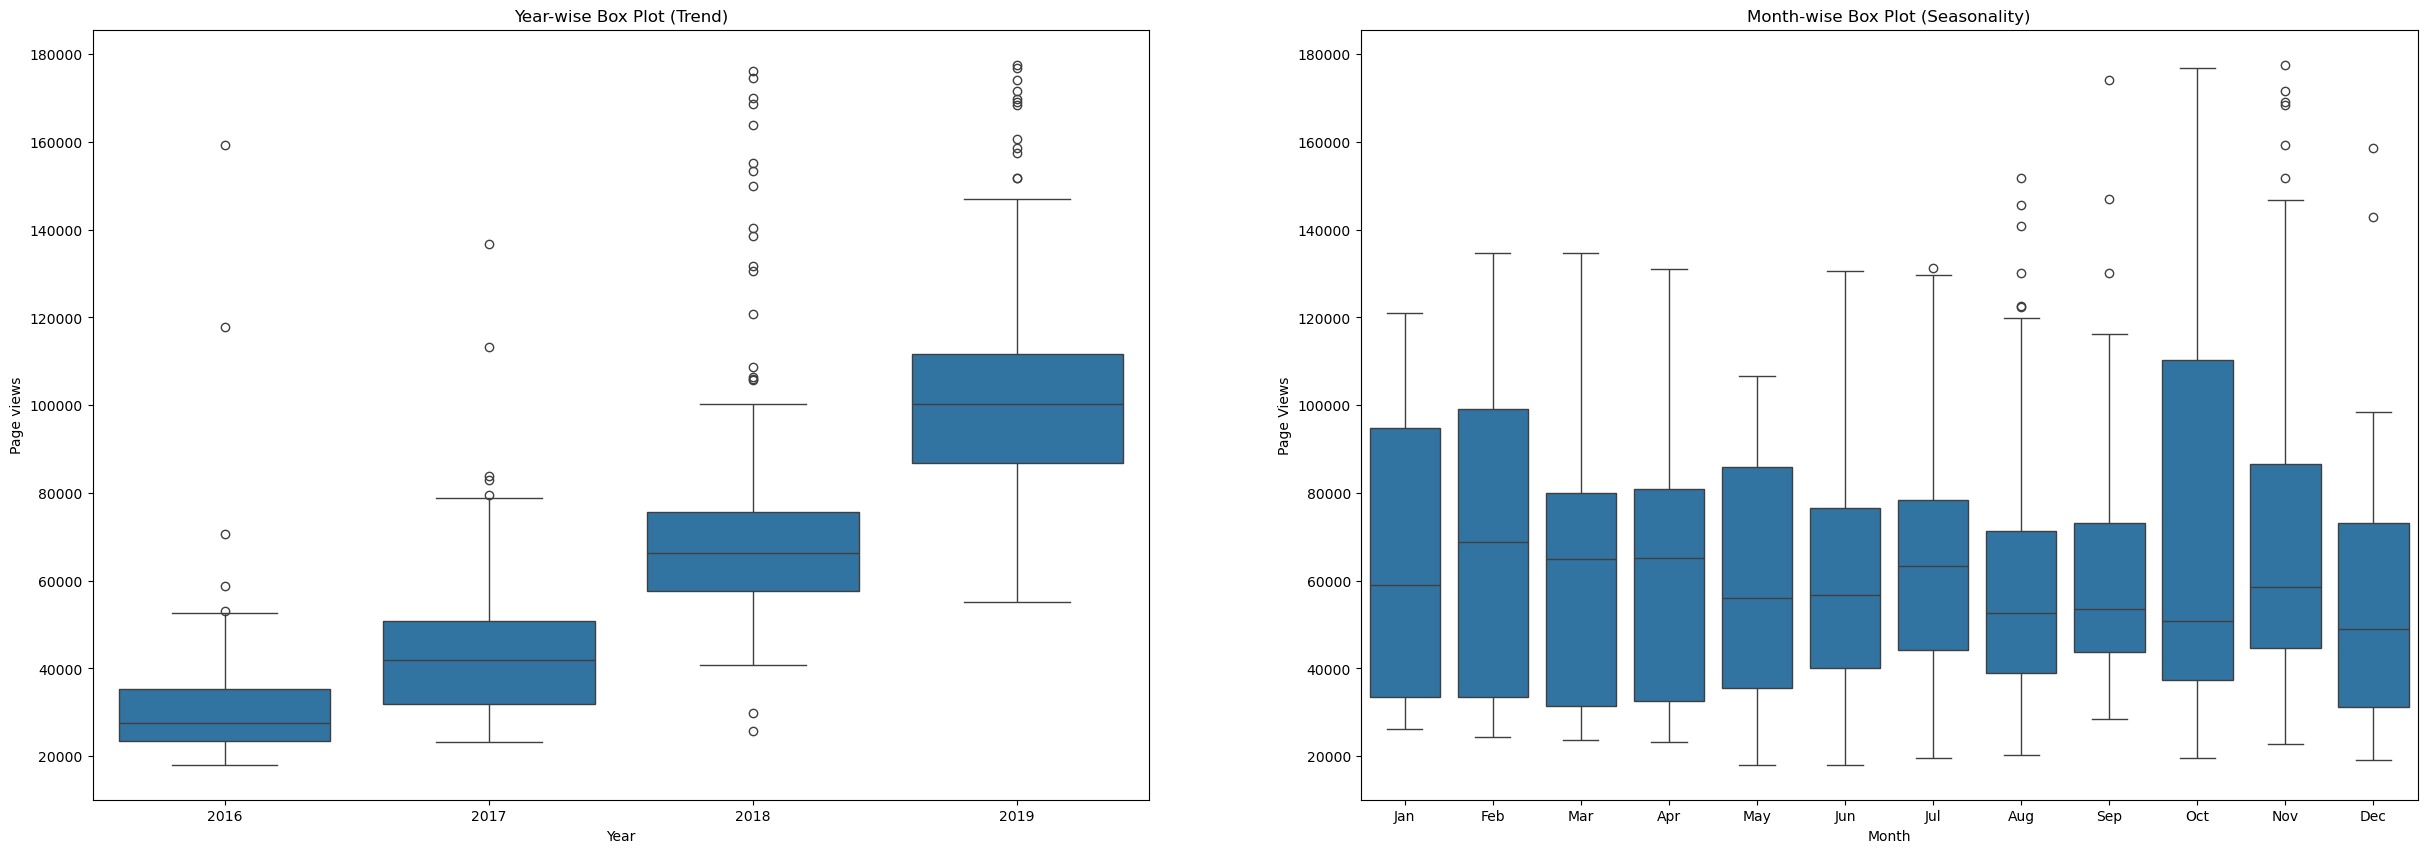

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30, 10))

sns.boxplot(x=df_box["year"], y=df_box["value"], ax=axs[0])
sns.boxplot(x=df_box["month"], y=df_box["value"], ax=axs[1])

axs[0].set_title("Year-wise Box Plot (Trend)")
axs[0].set_ylabel("Page views")
axs[0].set_xlabel("Year")

axs[1].set_title("Month-wise Box Plot (Seasonality)")
axs[1].set_ylabel("Page Views")
axs[1].set_xlabel("Month")